## Урок 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

In [192]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [2]:
#Задача 1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного
#и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы
#о разнице скорости сходимости каждого из методов.

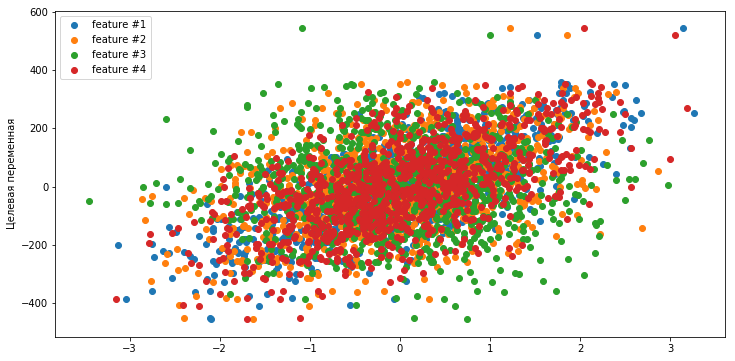

In [193]:
#Создадим учебный набор из 1000 объектов с 4 фичами,которые эти объекты описывают. Пусть только 3 из них будут информативными.
#Таргет может принимать любое значение на вещественной прямой. Используем степень зашумленности для таргета 0.8.

X, y, coef = datasets.make_regression(n_samples = 1000, n_features = 4, n_informative = 4, noise = 5, random_state = 111, coef = True)
X = np.vstack((np.ones(X.shape[0]), X.T)).T

plt.figure(figsize = (12,6))
plt.scatter(X[:,1], y, label = 'feature #1')
plt.scatter(X[:,2], y, label = 'feature #2')
plt.scatter(X[:,3], y, label = 'feature #3')
plt.scatter(X[:,4], y, label = 'feature #4')
plt.ylabel('Целевая переменная')
plt.legend()

In [194]:
#Найдем оптимальные значения весов при признаках с помощью градиентного спуска и стахостического градиентного спуска. Сравним,
#как изменяется среднеквадратичная ошибки от итерации к итерации. В теории при стохастическом градиентном спуске мы проигрываем
#в качестве каждого отдельного шага по сравнению с обычным градиентным спсуком, но в итоге все-таки достигаем целевого значения
#(при правильно подобраннй точке старта для спуска). Проверим это. 

# -- cреднеквадратичные ошибки двух алгоритмов будем складывать в список mse_list_%
# -- значения весов будем складывать в список w_list_%
# -- среднеквадратичную ошибку прогноза стохастического градиентного спуска, посчитанной по реккурентной формуе, в список Q

#точка начала старта алгоритма
w_start = np.array([90, 12, 0,  0, 0])

#кол-во итераций
n_iterations = 100000

#скорость обучения
eta = 0.01

#Список для значений весов, полученных на каждой итерации для градиентного спуска и стохастического градиентного спуска:
w_list_gr = []
w_list_st = []

#Список для значений среднеквадратичной ошибки, полученной на каждой итерации:
mse_list_gr = []
mse_list_st = []

#Функция для расчет mse
def mse(X, w, y):
    return np.sum((np.dot(X, w) - y)**2)/ len(y)

lamb = 0.01 

#Градиент среднеквадратичной ошибки
w_current_st = w_start
w_current_gr = w_start
Q = [mse(X, w_current_st, y)]

for i in range(n_iterations):
    j = np.random.randint(len(y))
    y_pred_st = np.dot(X[j], w_current_st)
    y_pred_gr = np.dot(X, w_current_gr)
    w_current_st = w_current_st - eta * (2/X.shape[0] * np.dot(y_pred_st - y[j], X[j]))
    w_current_gr = w_current_gr - eta * (2/X.shape[0] * np.dot(y_pred_gr - y, X))
  
    w_list_gr.append(w_current_gr)
    w_list_st.append(w_current_st)
    
    mse_current_gr = mse(X, w_current_gr, y)
    mse_current_st = mse(X, w_current_st, y)
    
    mse_list_gr.append(mse_current_gr)
    mse_list_st.append(mse_current_st)
    Q.append(Q[-1]*(1-lamb)+lamb*(np.dot(X[j], w_current_st) - y[j])**2)

Text(0.5,0,'Количество произведенных итераций')

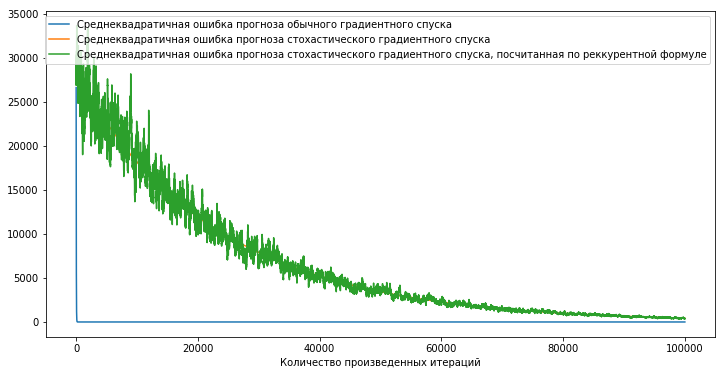

In [195]:
#Посмотрим на среднеквадратичные ошибки прогнозов:
plt.figure(figsize=(12, 6))
plt.plot(mse_list_gr, label = 'Среднеквадратичная ошибка прогноза обычного градиентного спуска')
plt.plot(mse_list_st, label = 'Среднеквадратичная ошибка прогноза стохастического градиентного спуска')
plt.plot(Q, label = 'Среднеквадратичная ошибка прогноза стохастического градиентного спуска, посчитанная по реккурентной формуле')
plt.legend(loc='upper right')
plt.xlabel('Количество произведенных итераций')

No handles with labels found to put in legend.


(-1, 150)

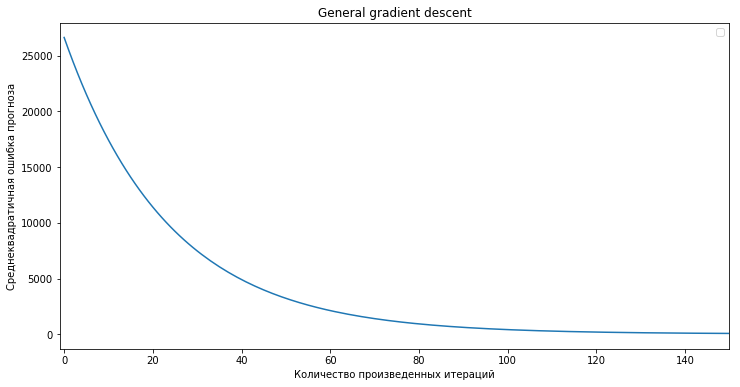

In [196]:
#Обычному градиентному спуску потребовалось не больше 150 итераций для достижения сходимости: векторы весов от шага к шагу
#изменяются незначительно, значит и mse начинает незначительно изменяться от итерации к итерации, что подтверждает  график.
plt.figure(figsize=(12, 6))
plt.title('General gradient descent')
plt.plot(mse_list_gr)
plt.legend()
plt.xlabel('Количество произведенных итераций')
plt.ylabel('Среднеквадратичная ошибка прогноза')
plt.xlim([-1, 150])

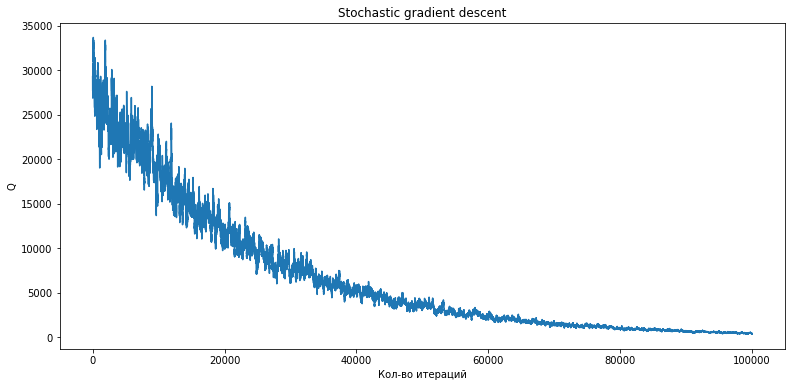

In [197]:
# Стохастическому градиентному спуску требуется намного больше итераций для достижения целевых значений mse: не хватает даже
#50000
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel('Кол-во итераций')
plt.ylabel('Q')
plt.plot(Q)

Text(0,0.5,'Вес при переменной N2')

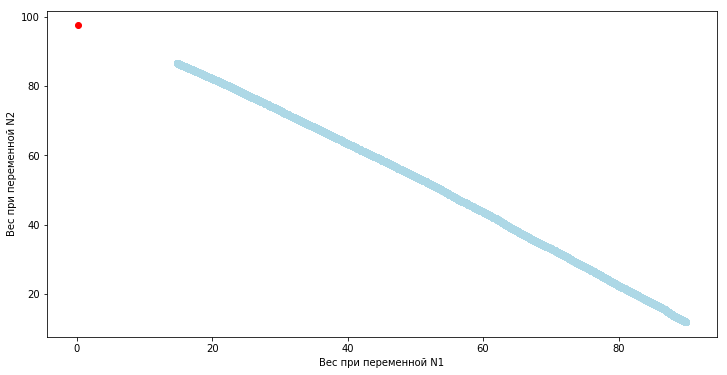

In [198]:
#Посмотрим, как веса приближаются к оптимальному значению весов, гарантирующих минимум среднеквадратичной ошибки
plt.figure(figsize=(12, 6))
plt.scatter(np.array(w_list_gr)[-1,0], np.array(w_list_gr)[-1,1], marker = 'o', color = 'red')
plt.scatter(np.array(w_list_st)[0:90000,0], np.array(w_list_st)[0:90000,1], color = 'lightblue', alpha=0.5)
plt.xlabel('Вес при переменной N1')
plt.ylabel('Вес при переменной N2')

In [199]:
#Задача №2. Модифицировать решение первого задания путем добавления $L_{2}$-регуляризации (в функцию, считающую MSE добавить
#норму весов, а в поправку нужно добавить производную для нормы вектора весов по весам) и сравнить результаты.

#точка начала старта алгоритма
w_start = np.array([90, 12, 0,  0, 0])

#кол-во итераций
n_iterations = 100000

#скорость обучения
eta = 0.01

#Список для значений весов, полученных на каждой итерации для градиентного спуска и стохастического градиентного спуска:
w_list_gr = []
w_list_st = []

#Список для значений среднеквадратичной ошибки, полученной на каждой итерации:
mse_list_gr = []
mse_list_st = []

#Функция для расчет mse
def mse(X, w, y):
    return np.sum((np.dot(X, w) - y)**2)/ len(y)

lamb = 0.01 
lambda_ = 0.005 #для коэффициента при регуляризации

#Градиент среднеквадратичной ошибки
w_current_st = w_start
w_current_gr = w_start
Q = [mse(X, w_current_st, y)]

for i in range(n_iterations):
    j = np.random.randint(len(y))
    y_pred_st = np.dot(X[j], w_current_st)
    y_pred_gr = np.dot(X, w_current_gr)
    w_current_st = w_current_st - eta * (2/X.shape[0] * np.dot(y_pred_st - y[j], X[j]) + 2 * lambda_ * w_current_st)
    w_current_gr = w_current_gr - eta * (2/X.shape[0] * np.dot(y_pred_gr - y, X) + 2 * lambda_ * w_current_gr)
  
    w_list_gr.append(w_current_gr)
    w_list_st.append(w_current_st)
    
    mse_current_gr = mse(X, w_current_gr, y)
    mse_current_st = mse(X, w_current_st, y)
    
    mse_list_gr.append(mse_current_gr)
    mse_list_st.append(mse_current_st)
    Q.append(Q[-1]*(1-lamb)+lamb*(np.dot(X[j], w_current_st) - y[j])**2)

Text(0.5,0,'Количество произведенных итераций')

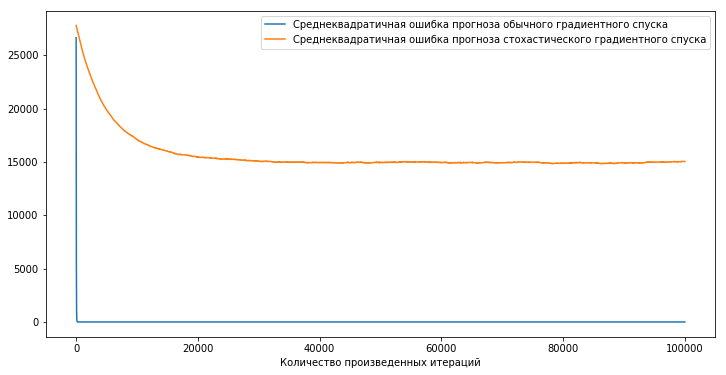

In [200]:
#Посмотрим на среднеквадратичные ошибки прогнозов: видим, что при стохастическом градиентном спуске качество алгоритма страдает,
#мы не приближаемся к минимуму mse даже спустя 100000 итераций, не давая весам сильно расти
plt.figure(figsize=(12, 6))
plt.plot(mse_list_gr, label = 'Среднеквадратичная ошибка прогноза обычного градиентного спуска')
plt.plot(mse_list_st, label = 'Среднеквадратичная ошибка прогноза стохастического градиентного спуска')
plt.legend(loc='upper right')
plt.xlabel('Количество произведенных итераций')

(0, 100)

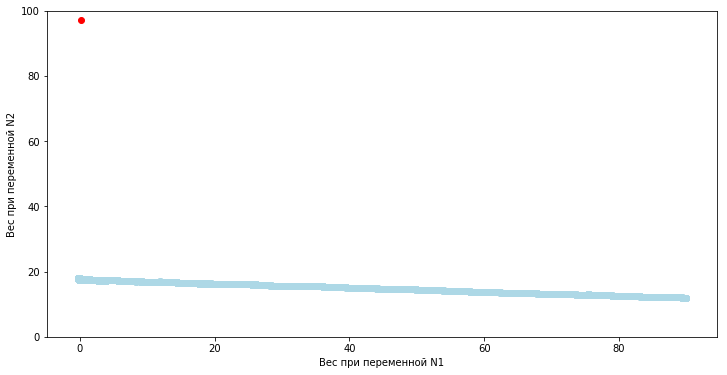

In [201]:
#Веса штрафуются за большое значение, в результате мы не находим глобального минимума для mse, не находим оптимальных весов:
plt.figure(figsize=(12, 6))
plt.scatter(np.array(w_list_gr)[-1,0], np.array(w_list_gr)[-1,1], marker = 'o', color = 'red')
plt.scatter(np.array(w_list_st)[0:80000,0], np.array(w_list_st)[0:80000,1], color = 'lightblue', alpha=0.5)
plt.xlabel('Вес при переменной N1')
plt.ylabel('Вес при переменной N2')
plt.ylim([0,100])